In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data

data = pd.read_csv('winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

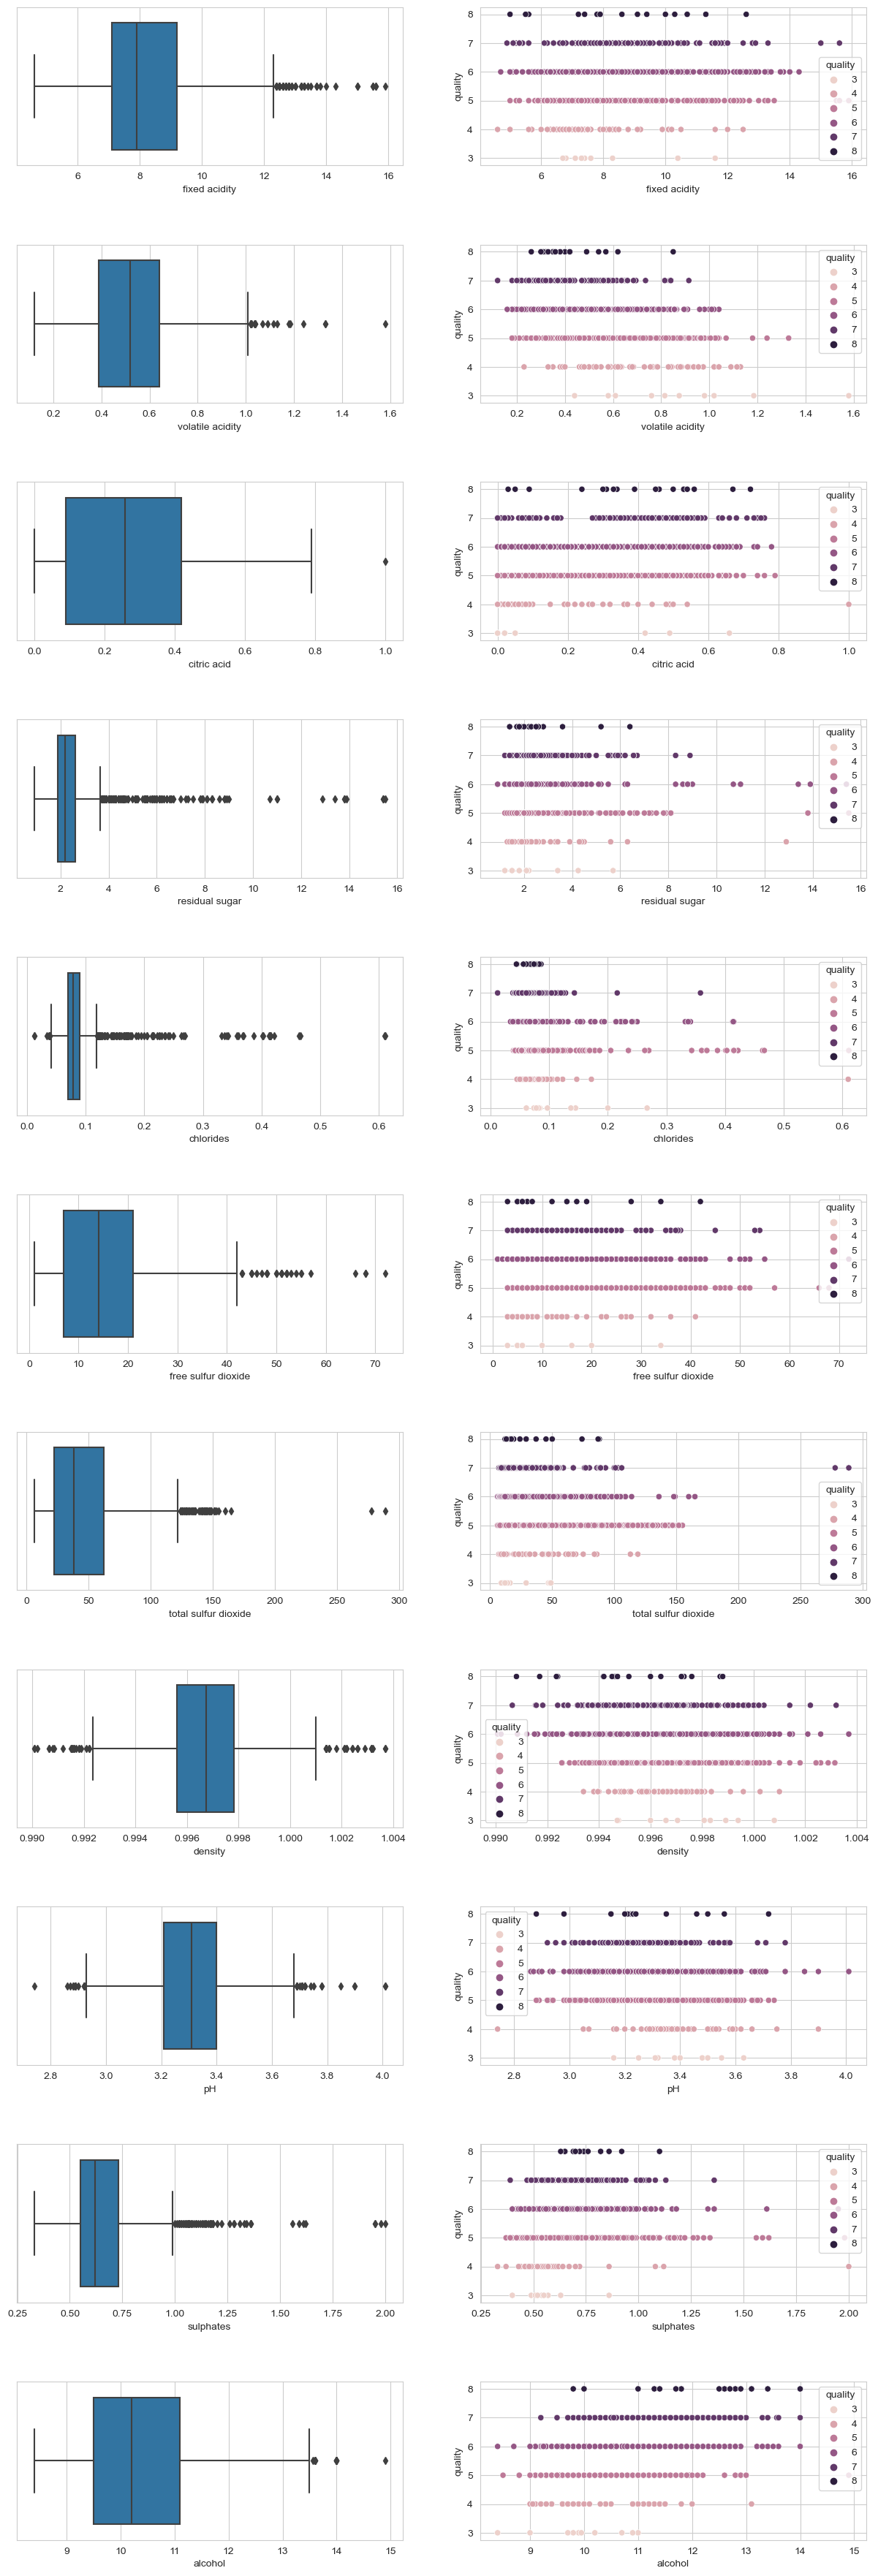

In [7]:
#menampilkan persebaran data

features = data.columns.tolist()

fig, ax = plt.subplots(11, 2, figsize=(15, 45))
plt.subplots_adjust(hspace=0.5)

for i in range(len(features)-1):
    sns.boxplot(data=data, x=features[i], ax=ax[i, 0])
    sns.scatterplot(data=data, x=features[i], y='quality' ,hue='quality', ax=ax[i, 1])

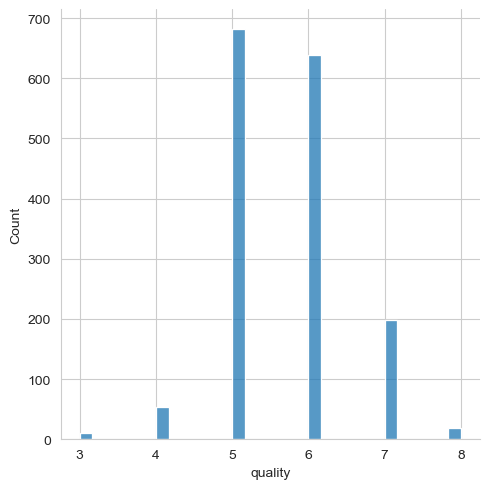

In [8]:
sns.displot(data['quality'])

<Axes: >

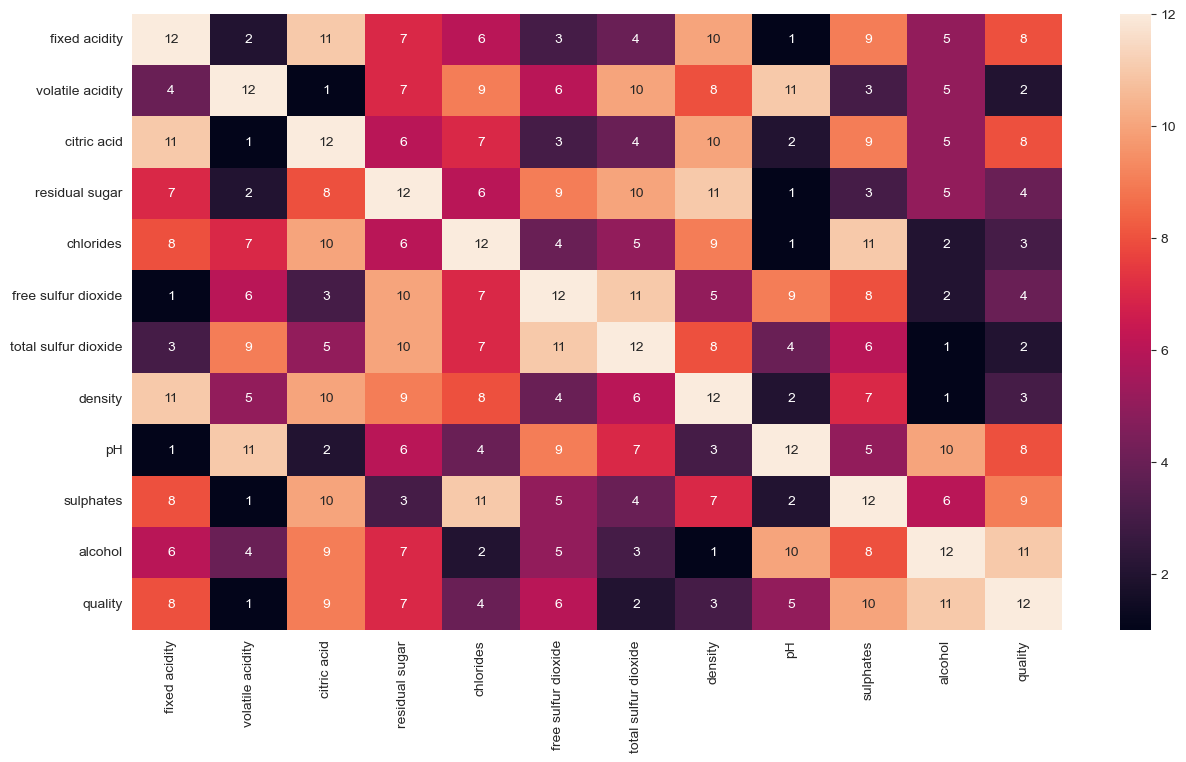

In [59]:
#menampilkan skor korelasi antar kolom

plt.figure(figsize=(15, 8))
sns.heatmap(data.corr().rank(axis=1), annot=True)

<Axes: >

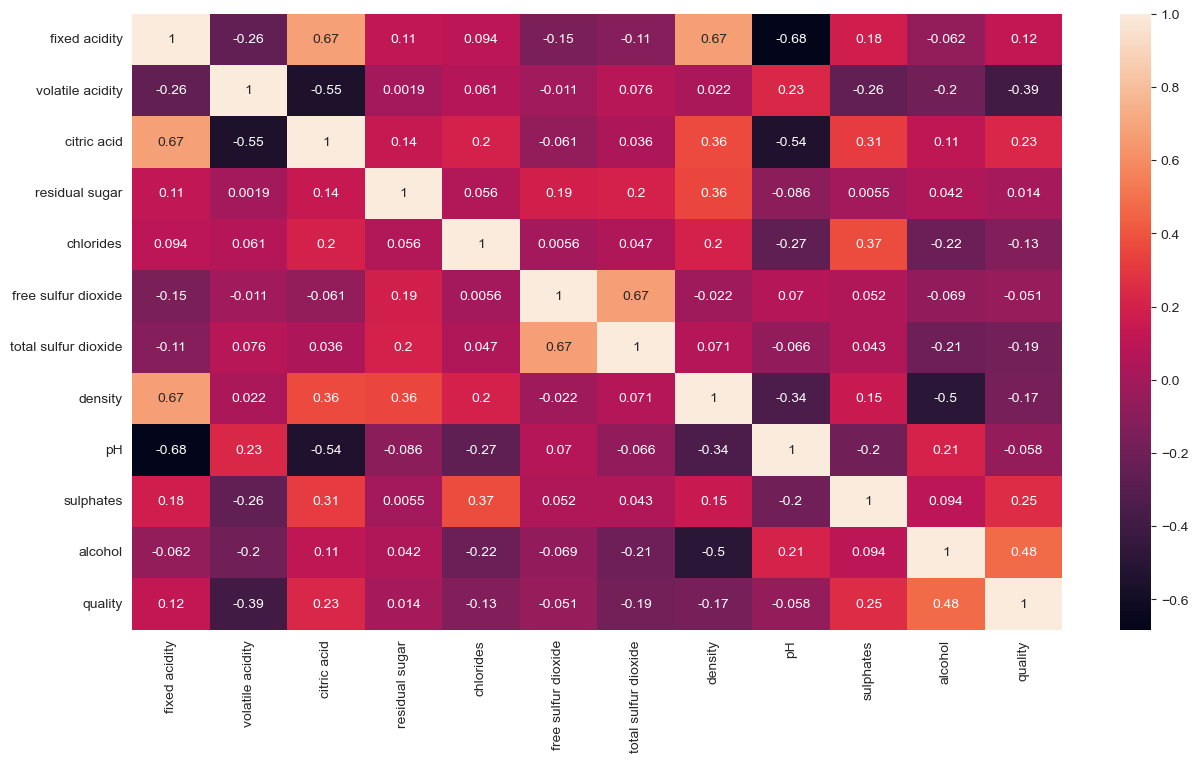

In [60]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True)

In [11]:
newdata = data.copy()

In [12]:
#mengubah 3 4 5 menjadi 0 (bad) dan 6 7 8 menjadi 1 (good)

newdata['quality'] = newdata['quality'].apply(lambda x: 0 if 3 <= x <= 5 else 1)
newdata

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [13]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
#memisahkan x dan y

X = newdata.iloc[:, :-1]
y = newdata.iloc[:, -1]

In [15]:
#scaling

minmax = MinMaxScaler()
minmax_data = minmax.fit_transform(X)
minmax_data

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [16]:
features = data.drop('quality', axis=1).columns.tolist()
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [17]:
df_minmax = pd.DataFrame(minmax_data, columns=features)
df_minmax

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


In [18]:
newdata = pd.concat([df_minmax, y.reset_index(drop=True)], axis=1)
newdata

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,1
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,1
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0


In [19]:
X = newdata.iloc[:, :-1]
y = newdata.iloc[:, -1]

In [20]:
#membuat data train dan test

X_temp, X_test, y_temp, y_test = train_test_split(X, y,test_size=0.2, random_state=42, stratify=y, shuffle=True)

In [21]:
#membuat data train dan validation

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

In [22]:
gini_model = RandomForestClassifier(criterion='gini')
gini_model.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
y_val_pred = gini_model.predict(X_val)
print(f'Validation accuracy: {accuracy_score(y_val, y_val_pred)}')

Validation accuracy: 0.784375


In [24]:
ent_model = RandomForestClassifier(criterion='entropy')
ent_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [25]:
y_val_pred = ent_model.predict(X_val)
print(f'Validation accuracy: {accuracy_score(y_val, y_val_pred)}')

Validation accuracy: 0.78125


In [26]:
y_pred = gini_model.predict(X_test)
print(f'Test accuracy: {accuracy_score(y_test, y_pred)}')

Test accuracy: 0.7875


In [27]:
from sklearn.model_selection import GridSearchCV

params_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid = params_grid, scoring = 'accuracy')

In [28]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [29]:
print(f'grid search best estimators: {grid_search.best_estimator_}')

grid search best estimators: RandomForestClassifier(n_estimators=300, random_state=42)


In [30]:
y_val_pred = grid_search.predict(X_val)
print(f'validation accuracy with grid search: {accuracy_score(y_val, y_val_pred)}')

validation accuracy with grid search: 0.79375


In [31]:
y_test_pred = grid_search.predict(X_test)
print(f'validation accuracy with grid search: {accuracy_score(y_test, y_test_pred)}')

validation accuracy with grid search: 0.803125


In [32]:
#menggunakan PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.3610818 , 0.19897656, 0.14591549, 0.07288015, 0.0536702 ,
       0.05208199, 0.03858224, 0.03325372, 0.02265836, 0.01492171,
       0.00597779])

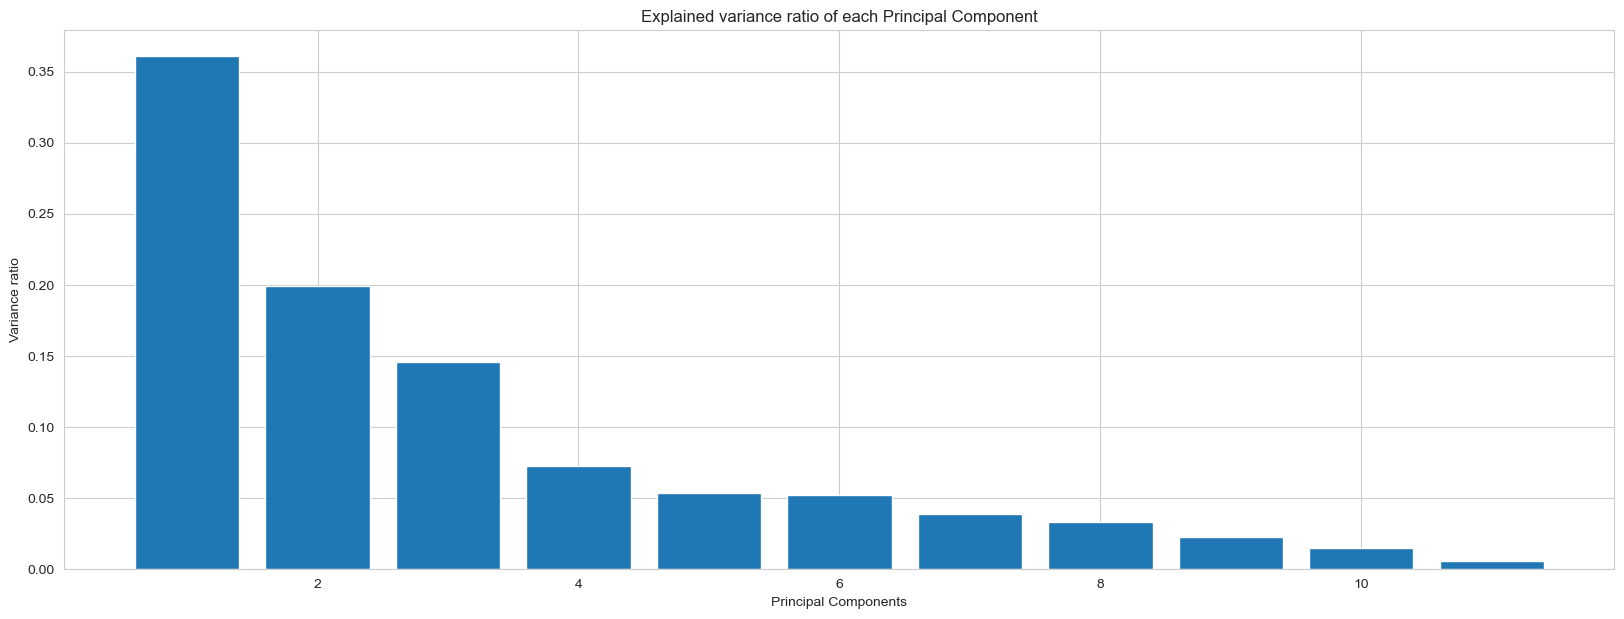

In [33]:
plt.figure(figsize=(20, 7))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, label='Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Variance ratio')
plt.title('Explained variance ratio of each Principal Component')
plt.show()

In [58]:
pca.explained_variance_ratio_.sum()

0.9999999999999998

In [34]:
mdi_importances = pd.Series(gini_model.feature_importances_, index=features).sort_values(ascending=True)

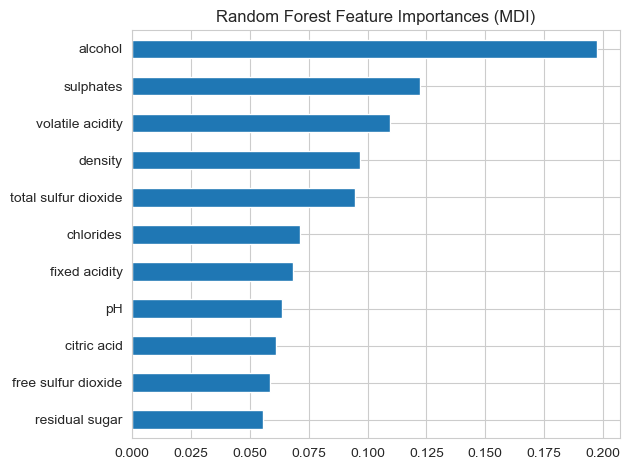

In [35]:
ax=mdi_importances.plot.barh()
ax.set_title('Random Forest Feature Importances (MDI)')
ax.figure.tight_layout()

TANPA PCA

In [36]:
X = newdata.drop(['quality'], axis=1)
y = newdata['quality']

In [37]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3)

In [53]:
rf = RandomForestClassifier(n_estimators=500, random_state=42, criterion='log_loss')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=500, random_state=42)

In [54]:
mod_pred = rf.predict(X_train)
print(f'Accuracy: {accuracy_score(y_train, mod_pred)}')

Accuracy: 1.0


In [61]:
# kelarin nanti aja........

import pydotplus
import six

plt.figure(figsize=(16, 8))
tree.plot_tree(rf)
plt.show()

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got RandomForestClassifier(criterion='log_loss', n_estimators=500, random_state=42) instead.

<Figure size 1600x800 with 0 Axes>

In [39]:
y_val_pred = rf.predict(X_val)
print(f'Accuracy: {accuracy_score(y_val, y_val_pred)}')

Accuracy: 0.94375


In [40]:
y_pred = rf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8270833333333333


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       237
           1       0.80      0.87      0.84       243

    accuracy                           0.83       480
   macro avg       0.83      0.83      0.83       480
weighted avg       0.83      0.83      0.83       480


In [42]:
for i in range(1, len(features)-1):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_train)
    print(f' PCA explained in n component {i}: {pca.explained_variance_ratio_}')

 PCA explained in n component 1: [0.35658908]
 PCA explained in n component 2: [0.35658908 0.20009368]
 PCA explained in n component 3: [0.35658908 0.20009368 0.1489968 ]
 PCA explained in n component 4: [0.35658908 0.20009368 0.1489968  0.07250313]
 PCA explained in n component 5: [0.35658908 0.20009368 0.1489968  0.07250313 0.05328468]
 PCA explained in n component 6: [0.35658908 0.20009368 0.1489968  0.07250313 0.05328468 0.05059951]
 PCA explained in n component 7: [0.35658908 0.20009368 0.1489968  0.07250313 0.05328468 0.05059951
 0.03949313]
 PCA explained in n component 8: [0.35658908 0.20009368 0.1489968  0.07250313 0.05328468 0.05059951
 0.03949313 0.03571673]
 PCA explained in n component 9: [0.35658908 0.20009368 0.1489968  0.07250313 0.05328468 0.05059951
 0.03949313 0.03571673 0.02233163]


PAKAI PCA

In [43]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)

In [44]:
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [45]:
model = RandomForestClassifier(n_estimators=800, max_features=4, random_state=1)
model.fit(X_train_pca, y_train)

RandomForestClassifier(max_features=4, n_estimators=800, random_state=1)

In [46]:
y_val_pred = model.predict(X_val_pca)
val_accuracy = accuracy_score(y_val, y_val_pred)

In [47]:
print(f'Validation Accuracy: {val_accuracy}')

Validation Accuracy: 0.940625


In [48]:
y_test_pred = model.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [49]:
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.81875


In [50]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       237
           1       0.80      0.85      0.83       243

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.82      0.82      0.82       480


In [51]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()

k = [2, 3, 5, 7, 10]

for i in k:
    scores = cross_val_score(model, X, y, cv=i)
    print(f'Cross-validation scores with K-{i}: {scores}')
    print(f'Average cross-validation score: {scores.mean()}, {scores.std()}')
    print('-' * 50)

Cross-validation scores with K-2: [0.6825   0.718398]
Average cross-validation score: 0.7004489987484355, 0.01794899874843553
--------------------------------------------------
Cross-validation scores with K-3: [0.69793621 0.73733583 0.7260788 ]
Average cross-validation score: 0.7204502814258912, 0.016569907816750183
--------------------------------------------------
Cross-validation scores with K-5: [0.690625   0.7125     0.771875   0.715625   0.71786834]
Average cross-validation score: 0.7216986677115987, 0.02690506827915956
--------------------------------------------------
Cross-validation scores with K-7: [0.62445415 0.77292576 0.62445415 0.86842105 0.70175439 0.75438596
 0.71929825]
Average cross-validation score: 0.7236705300368825, 0.0797401537196005
--------------------------------------------------
Cross-validation scores with K-10: [0.5875     0.80625    0.7125     0.64375    0.7375     0.76875
 0.7375     0.75       0.7375     0.68553459]
Average cross-validation score: 0.7